In [71]:
import pandas as pd
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)
import numpy as np
import matplotlib.pyplot as plt
import random

In [72]:
bf = pd.read_json('./business.json',lines=True)

In [73]:
grouped_by_city = bf.groupby('city')['business_id'].agg(['count']).sort_values(by='count',ascending=False)

In [74]:
grouped_by_city[:10]

,count
city,
Las Vegas,24768
Phoenix,15656
Toronto,15483
Charlotte,7557
Scottsdale,7510
Pittsburgh,5688
Montréal,5175
Mesa,5146
Henderson,4130


In [75]:
cities = grouped_by_city[:10].index.values
new_group = {}
for i in cities:
    new_group[i] = bf.loc[bf['city'] == i]

In [76]:
countries = ['Mexican', 'Indian', 'Chinese', 'Korean', 'Japanese', 'Italian', 'Spanish']

In [77]:
def groupbycounties(bf, ind, col, c):
    for i in bf[col].loc[ind]:
        if i in c:
            return i
        else:
            return
gb = bf.groupby(lambda x: groupbycounties(bf, x, 'categories', countries))

In [78]:
gb_count = gb.count()['business_id']
grouped_data = {}
for i in countries:
    grouped_data[i] = {}
    grouped_data[i]['lat'] = gb.get_group(i)['latitude'].tolist()
    grouped_data[i]['long'] = gb.get_group(i)['longitude'].tolist()

In [79]:
gb_count.keys()

Index(['Chinese', 'Indian', 'Italian', 'Japanese', 'Korean', 'Mexican',
       'Spanish'],
      dtype='object')

In [80]:
gb_count

Chinese     1398
Indian       459
Italian     1359
Japanese     706
Korean       226
Mexican     1424
Spanish       42
Name: business_id, dtype: int64

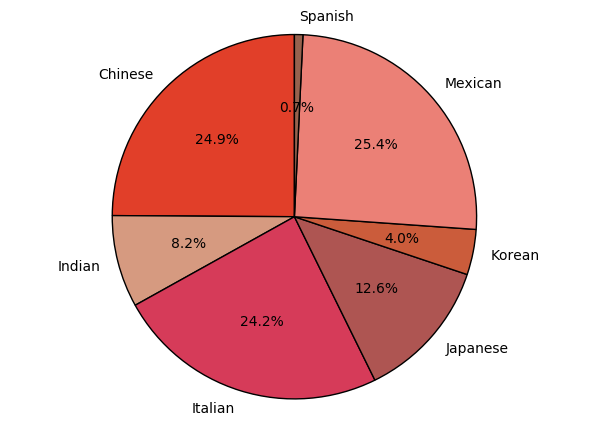

In [81]:
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]

# Create a pie chart
plt.pie(
    # using data total)arrests
    gb_count,
    # with the labels being officer names
    labels=gb_count.keys(),
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()

In [82]:
def set_data(lat, lng, name):
    r = random.randint(0,255)
    g = random.randint(0,255)            
    b = random.randint(0,255)
    data = dict(
            type = 'scattergeo',
            locationmode = '',
            name = i,
            lat = lat,
            lon = lng,
            text = [],
            mode = 'markers',
            marker = dict(
                size = 8,
                opacity = 0.8,
                reversescale = True,
                autocolorscale = False,
                symbol = 'square',
                line = dict(
                    width=1,
                    color='rgba(r, g, b)'
                ),
                cmin = 0,
            ))
    return data


In [84]:
data = []
for i in grouped_data:
    lat = grouped_data[i]['lat']
    lng = grouped_data[i]['long']
    data.append(set_data(lat, lng, i));
    
layout = dict(
        title = 'business by category in different cities)',
        colorbar = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig = dict( data=data, layout=layout )
plotly.offline.iplot( fig, validate=False, filename='d3-airports' )